# DL

指定随机种子，确保每次生成一样的随机数

## 定义环境
随机生成股票价格序列

In [3]:
import random
import time

class Stock:
    def __init__(self, symbol, initial_price, initial_quantity):
        self.symbol = symbol
        self.price = initial_price
        self.quantity = initial_quantity
        self.price_history = [initial_price]  # 记录每天的股票价格

    def fluctuate(self):
        # 控制股价波动在-10%到10%之间
        change_percentage = random.uniform(-0.1, 0.1)
        self.price *= (1 + change_percentage)
        self.price = round(self.price, 3)  # 保留小数点后三位
        self.price_history.append(self.price)

    def print_stock_status(self):
        print('Stock Status:',self.symbol, self.quantity, self.price)

    def get_stock_price(self):
        return self.price

    def get_quantity(self):
        return self.quantity
        

In [32]:
stock = Stock("AAPL", 100, 10000)
stock.fluctuate()
print(stock.price)
stock.fluctuate()
print(stock.price)

91.041
94.647


## 定义Action

In [33]:

class Trader:
    def __init__(self, name, strategy, initial_funds, initial_quantity, stock):
        self.name = name
        self.strategy = strategy
        self.funds = initial_funds
        self.quantity = initial_quantity
        self.total_assets = initial_funds + initial_quantity * stock.price
        self.funds_history = [round(initial_funds, 3)]  # 记录每天的金额
        self.quantity_history = [initial_quantity]  # 记录每天的持有股份
        self.total_assets_history = [round(self.total_assets, 3)]  # 记录每天的总资产

    def trade(self, stock):
        action = self.strategy(stock)
        if action == 'buy':
            if self.funds >= stock.price:
                buy_quantity = min(stock.quantity, int(self.funds / stock.price))
                self.funds -= buy_quantity * stock.price
                self.quantity += buy_quantity
                print(f"{self.name}买入了{buy_quantity}股{stock.symbol}股票，花费了{buy_quantity * stock.price}元")
            else:
                print(f"{self.name}资金不足，无法购买{stock.symbol}股票")
        elif action == 'sell':
            if self.quantity > 0:
                sell_quantity = min(self.quantity, stock.quantity)
                self.funds += sell_quantity * stock.price
                self.quantity -= sell_quantity
                print(f"{self.name}卖出了{sell_quantity}股{stock.symbol}股票，获得了{sell_quantity * stock.price}元")
            else:
                print(f"{self.name}持有{stock.symbol}股票数量为0，无法卖出")


## 定义的Agent

In [28]:
# 不同的交易策略函数
def random_strategy(stock):
    r = random.random()
    print(r)
    if r < 0.5:
        return 'buy'
    else:
        return 'sell'
def fixed_strategy1(stock):
    if stock.price < 100:
        return 'buy'
    elif stock.price > 110:
        return 'sell'
    else:
        return 'hold'
        def fixed_strategy2(stock):
    if stock.price < 90:
        return 'buy'
    elif stock.price > 120:
        return 'sell'
    else:
        return 'hold'

def momentum_strategy(stock):
    # 假设前一天的股价为prev_price
    if hasattr(stock, 'prev_price'):
        if stock.price > stock.prev_price:  # 如果股价上涨则买入
            stock.prev_price = stock.price
            return 'buy'
        elif stock.price < stock.prev_price:  # 如果股价下跌则卖出
            stock.prev_price = stock.price
            return 'sell'
        else:
            return 'hold'
    else:
        stock.prev_price = stock.price
        return 'hold'


IndentationError: expected an indented block after function definition on line 16 (3061640151.py, line 17)

Profit & Loss 表现

In [34]:
# 不同的交易策略函数
def random_strategy(stock):
    r = random.random()
    print(r)
    if r < 0.5:
        return 'buy'
    else:
        return 'sell'
def fixed_strategy1(stock):
    if stock.price < 100:
        return 'buy'
    elif stock.price > 110:
        return 'sell'
    else:
        return 'hold'
        def fixed_strategy2(stock):
    if stock.price < 90:
        return 'buy'
    elif stock.price > 120:
        return 'sell'
    else:
        return 'hold'

def momentum_strategy(stock):
    # 假设前一天的股价为prev_price
    if hasattr(stock, 'prev_price'):
        if stock.price > stock.prev_price:  # 如果股价上涨则买入
            stock.prev_price = stock.price
            return 'buy'
        elif stock.price < stock.prev_price:  # 如果股价下跌则卖出
            stock.prev_price = stock.price
            return 'sell'
        else:
            return 'hold'
    else:
        stock.prev_price = stock.price
        return 'hold'
# 创建股票
initial_quantity = 100000
stock = Stock("AAPL", 100, initial_quantity)

# 初始资金
initial_funds = 1000000  # 100万

# 创建交易者，并为每个交易者指定不同的交易策略、初始资金和初始持有股份
traders = [
    Trader("小明", random_strategy, initial_funds, 0, stock)]
    Trader("小美", fixed_strategy1, initial_funds, 800,stock),
    Trader("小钱", fixed_strategy2, initial_funds, 800),
    Trader("小王", momentum_strategy, initial_funds, 0),
    Trader("小宋", lambda stock: 'buy' if stock.price > 100 else 'sell', initial_funds, 0),  # 价格上涨策略
    Trader("小杨", lambda stock: 'buy' if stock.price < 100 else 'sell', initial_funds, 0),  # 价格下跌策略
    Trader("小强", lambda stock: 'buy' if (day % 7 == 0) else 'hold', initial_funds, 0),  # 固定时间买入策略
    Trader("小李", lambda stock: 'sell' if (day % 30 == 0) else 'hold', initial_funds, initial_quantity)  # 固定时间卖出策略
# 模拟交易过程
for day in range(1, 31):
    print(f"第 {day} 天，股票 {stock.symbol} 的价格为 {stock.price}")
    for trader in traders:
        trader.trade(stock)
        trader.total_assets = trader.funds + trader.quantity * stock.price
        trader.funds_history.append(round(trader.funds, 3))
        trader.quantity_history.append(trader.quantity)
        trader.total_assets_history.append(round(trader.total_assets, 3))
    stock.fluctuate()
    #time.sleep(0.5)  # 休眠0.5秒，模拟实时交易

# 打印每个交易者最后一天的总资产
print("\n每个交易者最后一天的总资产：")
for trader in traders:
    print(f"{trader.name}: {trader.total_assets_history[-1]}")

IndentationError: expected an indented block after function definition on line 16 (384228266.py, line 17)

<Axes: >

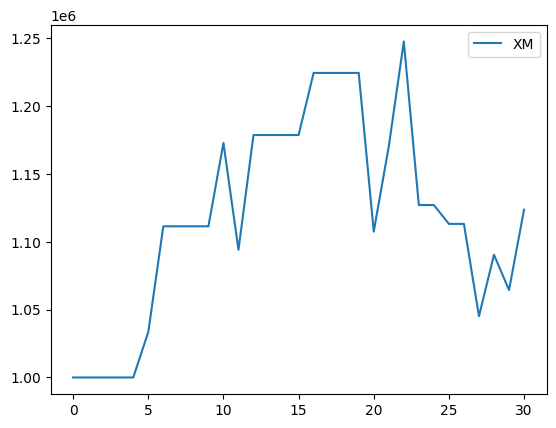

In [26]:
import pandas as pd
total_assets_df = pd.DataFrame(trader.total_assets_history,
             index=range(len(trader.total_assets_history)), 
             columns=['XM']
            )
total_assets_df.plot()

In [ ]:
def fixed_strategy1(stock):
    if stock.price < 100:
        return 'buy'
    elif stock.price > 110:
        return 'sell'
    else:
        return 'hold'


In [ ]:

def fixed_strategy2(stock):
    if stock.price < 90:
        return 'buy'
    elif stock.price > 120:
        return 'sell'
    else:
        return 'hold'

def momentum_strategy(stock):
    # 假设前一天的股价为prev_price
    if hasattr(stock, 'prev_price'):
        if stock.price > stock.prev_price:  # 如果股价上涨则买入
            stock.prev_price = stock.price
            return 'buy'
        elif stock.price < stock.prev_price:  # 如果股价下跌则卖出
            stock.prev_price = stock.price
            return 'sell'
        else:
            return 'hold'
    else:
        stock.prev_price = stock.price
        return 'hold'


In [ ]:

    Trader("小美", fixed_strategy1, initial_funds, 800),
    Trader("小钱", fixed_strategy2, initial_funds, 800),
    Trader("小王", momentum_strategy, initial_funds, 0),
    Trader("小宋", lambda stock: 'buy' if stock.price > 100 else 'sell', initial_funds, 0),  # 价格上涨策略
    Trader("小杨", lambda stock: 'buy' if stock.price < 100 else 'sell', initial_funds, 0),  # 价格下跌策略
    Trader("小强", lambda stock: 'buy' if (day % 7 == 0) else 'hold', initial_funds, 0),  # 固定时间买入策略
    Trader("小李", lambda stock: 'sell' if (day % 30 == 0) else 'hold', initial_funds, initial_quantity)  # 固定时间卖出策略
]

<Figure size 640x480 with 0 Axes>

第 1 天，股票 AAPL 的价格为 100
小明持有AAPL股票数量为0，无法卖出
小宋持有AAPL股票数量为0，无法卖出
小杨持有AAPL股票数量为0，无法卖出
第 2 天，股票 AAPL 的价格为 94.862
小明持有AAPL股票数量为0，无法卖出
小美买入了10541股AAPL股票，花费了999940.342元
小王持有AAPL股票数量为0，无法卖出
小宋持有AAPL股票数量为0，无法卖出
小杨买入了10541股AAPL股票，花费了999940.342元
第 3 天，股票 AAPL 的价格为 89.427
小明买入了11182股AAPL股票，花费了999972.714元
小美资金不足，无法购买AAPL股票
小钱买入了11182股AAPL股票，花费了999972.714元
小王持有AAPL股票数量为0，无法卖出
小宋持有AAPL股票数量为0，无法卖出
小杨资金不足，无法购买AAPL股票
第 4 天，股票 AAPL 的价格为 84.219
小明卖出了11182股AAPL股票，获得了941736.8579999999元
小美资金不足，无法购买AAPL股票
小钱资金不足，无法购买AAPL股票
小王持有AAPL股票数量为0，无法卖出
小宋持有AAPL股票数量为0，无法卖出
小杨资金不足，无法购买AAPL股票
第 5 天，股票 AAPL 的价格为 79.463
小明买入了11851股AAPL股票，花费了941716.0129999999元
小美资金不足，无法购买AAPL股票
小钱资金不足，无法购买AAPL股票
小王持有AAPL股票数量为0，无法卖出
小宋持有AAPL股票数量为0，无法卖出
小杨资金不足，无法购买AAPL股票
第 6 天，股票 AAPL 的价格为 85.625
小明卖出了11851股AAPL股票，获得了1014741.875元
小美资金不足，无法购买AAPL股票
小钱资金不足，无法购买AAPL股票
小王买入了11678股AAPL股票，花费了999928.75元
小宋持有AAPL股票数量为0，无法卖出
小杨资金不足，无法购买AAPL股票
第 7 天，股票 AAPL 的价格为 89.836
小明持有AAPL股票数量为0，无法卖出
小美资金不足，无法购买AAPL股票
小钱资金不足，无法购买AAPL股票
小王资金不足，无法购买AAPL股票
小宋持有AAPL股票数

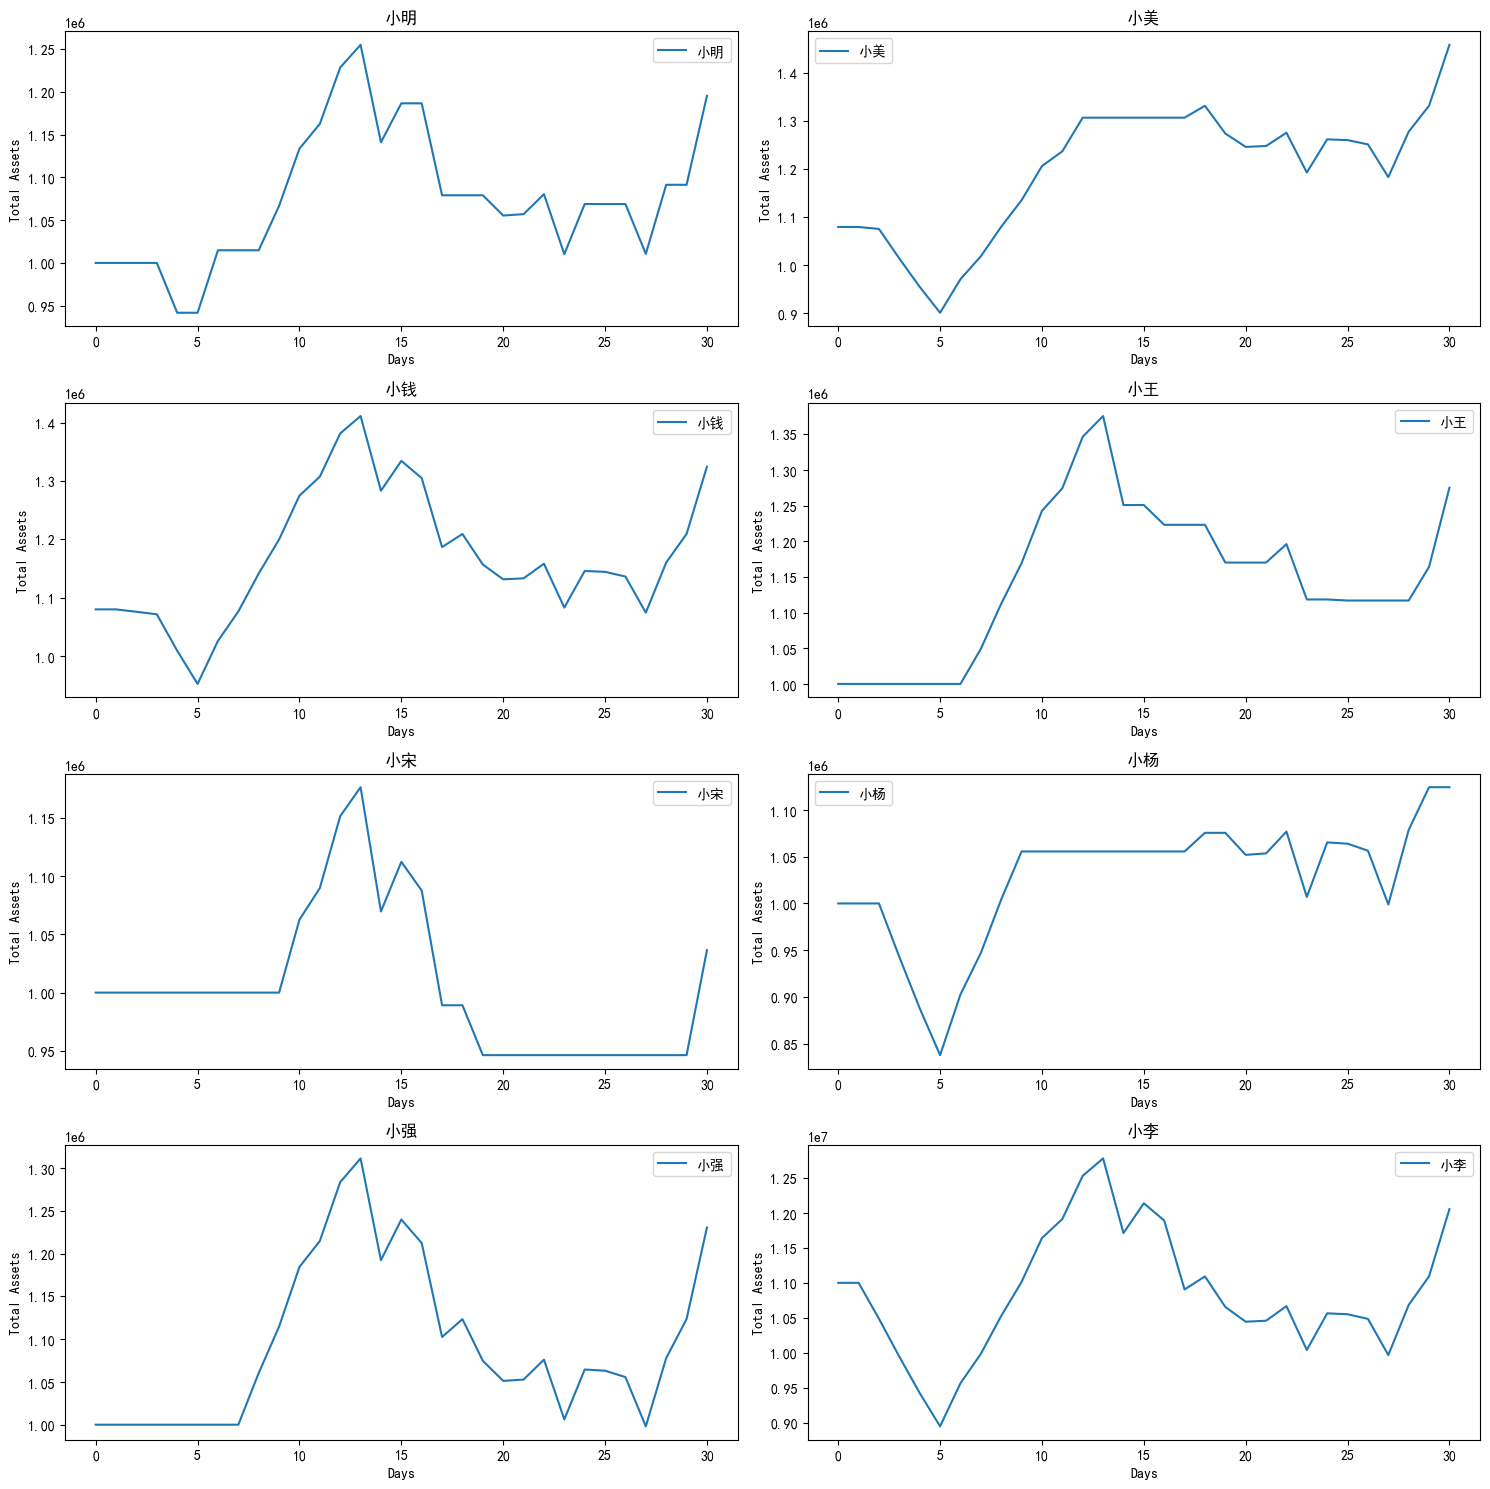

<Figure size 640x480 with 0 Axes>

小明的总资产为：1195298.3720000004
小美的总资产为：1459643.8260000001
小钱的总资产为：1324625.404
小王的总资产为：1275228.246
小宋的总资产为：1036449.0070000001
小杨的总资产为：1124385.2590000003
小强的总资产为：1230556.403
小李的总资产为：12054900.0


In [26]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# 绘制图表的代码

plt.tight_layout()
plt.show()


class Stock:
    def __init__(self, symbol, initial_price, initial_quantity):
        self.symbol = symbol
        self.price = initial_price
        self.quantity = initial_quantity
        self.price_history = [initial_price]  # 记录每天的股票价格

    def fluctuate(self):
        # 控制股价波动在-10%到10%之间
        change_percentage = random.uniform(-0.1, 0.1)
        self.price *= (1 + change_percentage)
        self.price = round(self.price, 3)  # 保留小数点后三位
        self.price_history.append(self.price)

class Trader:
    def __init__(self, name, strategy, initial_funds, initial_quantity):
        self.name = name
        self.strategy = strategy
        self.funds = initial_funds
        self.quantity = initial_quantity
        self.total_assets = initial_funds + initial_quantity * stock.price
        self.funds_history = [round(initial_funds, 3)]  # 记录每天的金额
        self.quantity_history = [initial_quantity]  # 记录每天的持有股份
        self.total_assets_history = [round(self.total_assets, 3)]  # 记录每天的总资产

    def trade(self, stock):
        action = self.strategy(stock)
        if action == 'buy':
            if self.funds >= stock.price:
                buy_quantity = min(stock.quantity, int(self.funds / stock.price))
                self.funds -= buy_quantity * stock.price
                self.quantity += buy_quantity
                stock.quantity -= buy_quantity
                print(f"{self.name}买入了{buy_quantity}股{stock.symbol}股票，花费了{buy_quantity * stock.price}元")
            else:
                print(f"{self.name}资金不足，无法购买{stock.symbol}股票")
        elif action == 'sell':
            if self.quantity > 0:
                sell_quantity = min(self.quantity, stock.quantity)
                self.funds += sell_quantity * stock.price
                self.quantity -= sell_quantity
                stock.quantity += sell_quantity
                print(f"{self.name}卖出了{sell_quantity}股{stock.symbol}股票，获得了{sell_quantity * stock.price}元")
            else:
                print(f"{self.name}持有{stock.symbol}股票数量为0，无法卖出")

class DQNAgent:
    def __init__(self, state_size, action_size):
        # 初始化深度 Q 学习代理
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []  # 记忆存储
        self.gamma = 0.95  # 折扣因子
        self.epsilon = 1.0  # 探索率
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, min(batch_size, len(self.memory)))  # 修正样本大小不超过记忆长度
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))  # 修改此处
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
# 不同的交易策略函数
def random_strategy(stock):
    if random.random() < 0.5:
        return 'buy'
    else:
        return 'sell'

def fixed_strategy1(stock):
    if stock.price < 100:
        return 'buy'
    elif stock.price > 110:
        return 'sell'
    else:
        return 'hold'

def fixed_strategy2(stock):
    if stock.price < 90:
        return 'buy'
    elif stock.price > 120:
        return 'sell'
    else:
        return 'hold'

def momentum_strategy(stock):
    # 假设前一天的股价为prev_price
    if hasattr(momentum_strategy, 'prev_price'):
        if stock.price > momentum_strategy.prev_price:  # 如果股价上涨则买入
            momentum_strategy.prev_price = stock.price
            return 'buy'
        elif stock.price < momentum_strategy.prev_price:  # 如果股价下跌则卖出
            momentum_strategy.prev_price = stock.price
            return 'sell'
        else:
            return 'hold'
    else:
        momentum_strategy.prev_price = stock.price
        return 'hold'

# 创建股票
initial_quantity = 100000
stock = Stock("AAPL", 100, initial_quantity)

# 初始资金
initial_funds = 1000000  # 100万

# 创建交易者，并为每个交易者指定不同的交易策略、初始资金和初始持有股份
traders = [
    Trader("小明", random_strategy, initial_funds, 0),
    Trader("小美", fixed_strategy1, initial_funds, 800),
    Trader("小钱", fixed_strategy2, initial_funds, 800),
    Trader("小王", momentum_strategy, initial_funds, 0),
    Trader("小宋", lambda stock: 'buy' if stock.price > 100 else 'sell', initial_funds, 0),  # 价格上涨策略
    Trader("小杨", lambda stock: 'buy' if stock.price < 100 else 'sell', initial_funds, 0),  # 价格下跌策略
    Trader("小强", lambda stock: 'buy' if (day % 7 == 0) else 'hold', initial_funds, 0),  # 固定时间买入策略
    Trader("小李", lambda stock: 'sell' if (day % 30 == 0) else 'hold', initial_funds, initial_quantity)  # 固定时间卖出策略
]

# 创建深度 Q 学习代理
state_size = 1
action_size = 3
agent = DQNAgent(state_size, action_size)

# 模拟交易过程
for day in range(1, 31):
    print(f"第 {day} 天，股票 {stock.symbol} 的价格为 {stock.price}")
    for trader in traders:
        trader.trade(stock)
        trader.total_assets = trader.funds + trader.quantity * stock.price
        trader.funds_history.append(round(trader.funds, 3))
        trader.quantity_history.append(trader.quantity)
        trader.total_assets_history.append(round(trader.total_assets, 3))
    stock.fluctuate()
    time.sleep(0.5)  # 休眠0.5秒，模拟实时交易

# 训练代理
for _ in range(100):
    agent.replay(32)  # 使用批量大小为32的重播

# 可视化每个交易者的总资产
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

for i, trader in enumerate(traders):
    row = i // 2
    col = i % 2
    axs[row, col].plot(trader.total_assets_history, label=trader.name)
    axs[row, col].set_xlabel('Days')
    axs[row, col].set_ylabel('Total Assets')
    axs[row, col].set_title(trader.name)
    axs[row, col].legend()
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为SimHei

# 绘制图表的代码

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
for trader in traders:
    print(f"{trader.name}的总资产为：{trader.total_assets}")